In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Import the necessary libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
#Create dataframe by reading given input csv file using pandas

df = pd.read_csv("/Users/Rattlehead/Downloads/GreatLakes/concrete.csv")

In [4]:
#Display the data types of dataframe

df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
# 5 point summary of numerical attributes can be seen using describe

df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#Independent variables: cement, slag, ash, water, superplastic, coarseagg, fineagg, age
#Target variable: strength

#Cement: Its the principal component which is required to make concrete
#    Mean: 281.167kg, Median: 272.9kg, Range: 102-540kg, Standard Deviation: 104.5, Quartiles: 25%- 192.3, 75%- 350

#Blast Furnace Slag: A hydraulic cement formed when granulated blast furnace slag (GGBFS) is ground to 
#                    suitable fineness
#    Mean: 73.89kg, Median: 22.0kg, Range: 0-359.4kg, Standard Deviation: 86.28, Quartiles: 25%- 0, 75%- 142.95

#Fly ash: A fine powder that is a byproduct of burning pulverized coal in electric generation power plants
#    Mean: 54.188kg, Median: 0kg, Range: 0-200.1kg, Standard Deviation: 63.9, Quartiles: 25%- 0, 75%- 118.3

#Water: Its the principal component which is required to make concrete
#    Mean: 181.56kg, Median: 185kg, Range: 121.8-247kg, Standard Deviation: 21.35, Quartiles: 25%- 164.9, 75%- 192

#Superplastic: Fine-grained metals and ceramics used to form components with double curvature and smooth contours
#    Mean: 6.2kg, Median: 6.4kg, Range: 0-32.2kg, Standard Deviation: 5.97, Quartiles: 25%- 0, 75%- 10.2

#Coarse Agg: Aggregates make up some 60 -80% of the concrete mix. They provide compressive strength and bulk to 
#            concrete. Coarse aggregates are particulates that are greater than 4.75mm.
#    Mean: 972.9kg, Median: 968kg, Range: 801-1145kg, Standard Deviation: 77.75, Quartiles: 25%- 932, 75%- 1029.4

#Fine Agg: Aggregates make up some 60 -80% of the concrete mix. They provide compressive strength and bulk to 
#            concrete. Fine aggregates are usually sand or crushed stone that are less than 9.55mm in diameter.
#    Mean: 773.58kg, Median: 779.5kg, Range: 594-992.6kg, Standard Deviation: 80.17, Quartiles: 25%- 730.95, 75%- 824

#Age: Age of concrete is the time elapsed since it was poured in place and left to set
#    Mean: 45.66days, Median: 28days, Range: 1-365days, Standard Deviation: 63.16, Quartiles: 25%- 7, 75%- 56

In [7]:
#Display the heade of dataframe

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [8]:
#Display the shape of dataframe

df.shape

(1030, 9)

In [9]:
#we can observe that distribution of slag, ash and superplastic is not uniform as we can see 0 value in min and 
#25% quartile

In [10]:
#Check for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
#Check for duplicate rows

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 25


In [12]:
#Drop duplicates
df = df.drop_duplicates()

df.shape

(1005, 9)

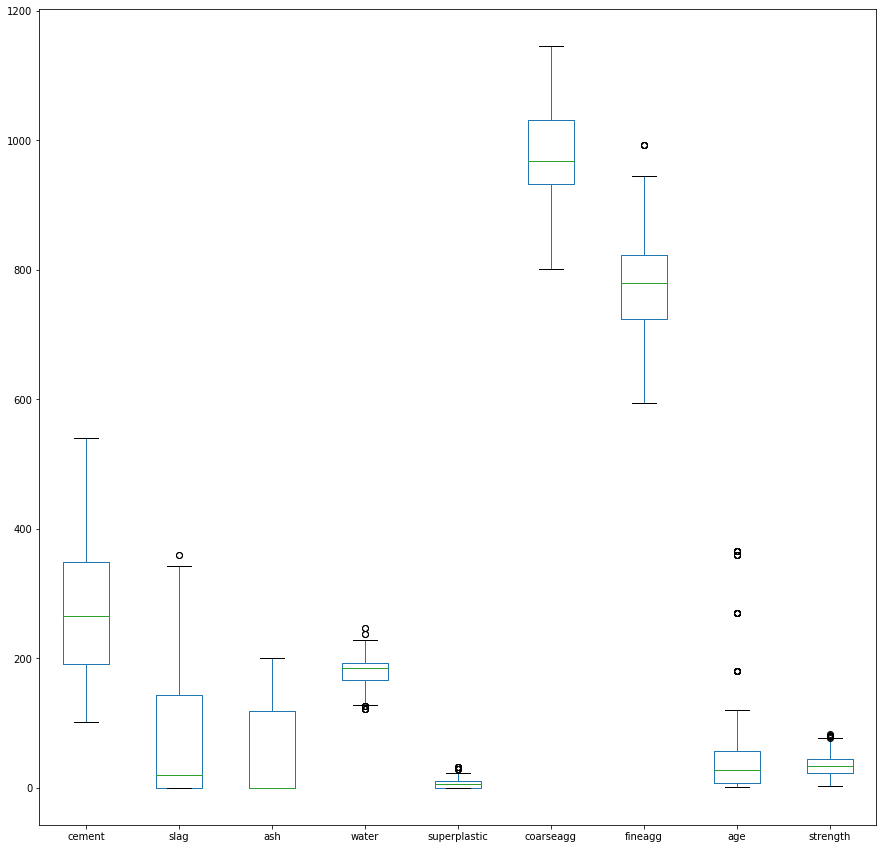

In [13]:
df.boxplot(grid = False, column=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age",
            "strength"], figsize = (15, 15))

In [14]:
#We can observe outliers for slag, water, superplastic, fineagg, age and strength

In [15]:
#Display the correlation of variables amongst each other

df.corr(method="pearson")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


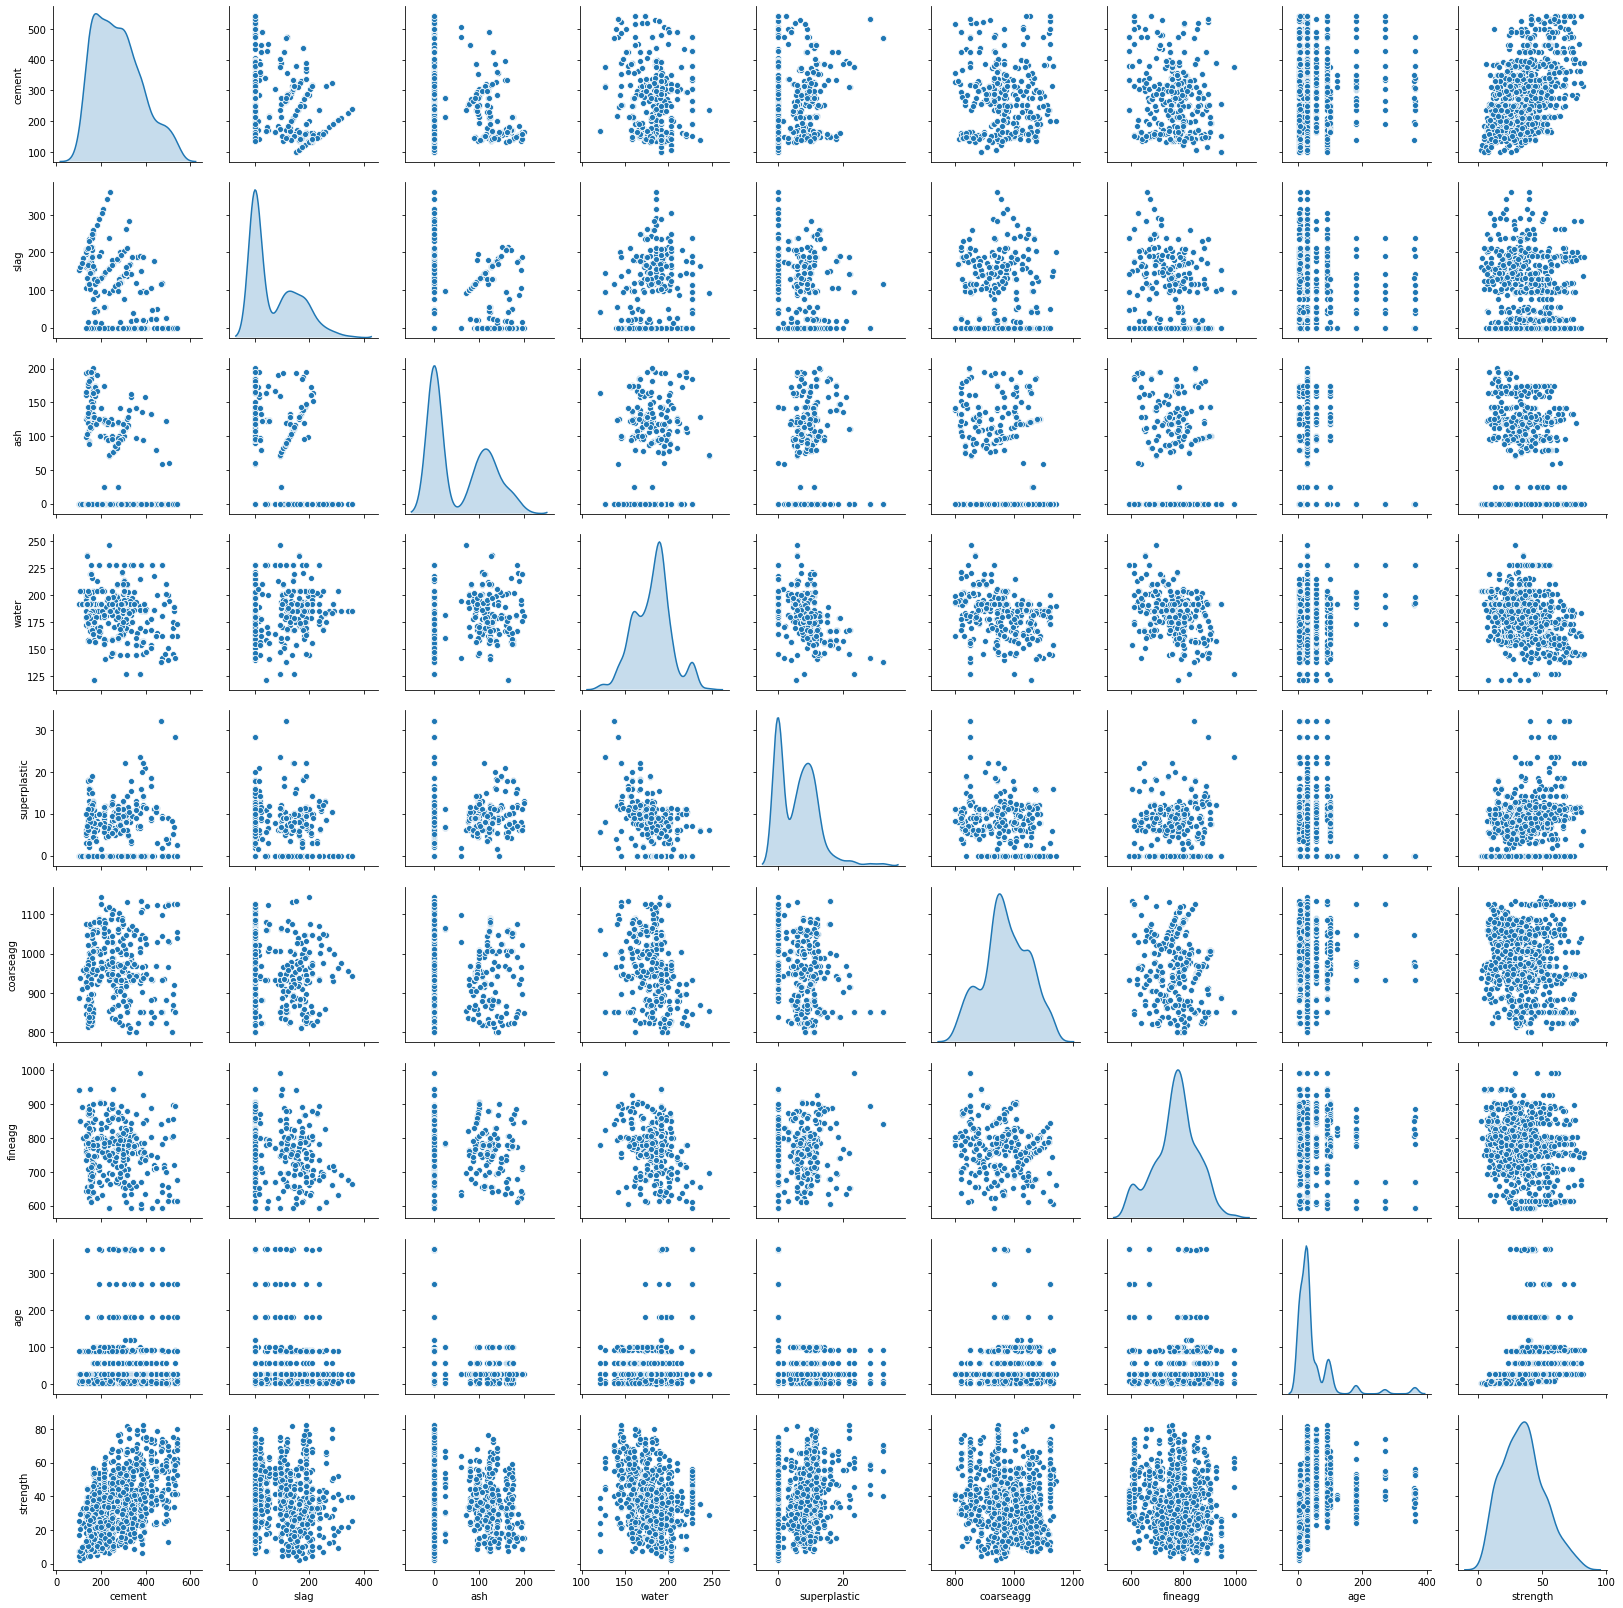

In [16]:
#cement, superplastic and age seem to have high correlation with strength

#Lets display the pair plot

sns.pairplot(df, diag_kind='kde')

In [17]:
#With cement it looks like a linear relationship with strength i.e. the more cement the more is the
#strength of concrete

#Similar is the case of superplastic along with data points with absence of superplastic

#Ash and water seems to have inverse linear relationship with strength i.e. the less both of them strength is better

#CoarseAgg and FineAgg are showing densed cloud of data points making them non-determistic how they are going to
#affect the strength of concrete

#With Age we can see we have more data points with less age and they are tending towards higher strength

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24d9fb50>,
      dtype=object)

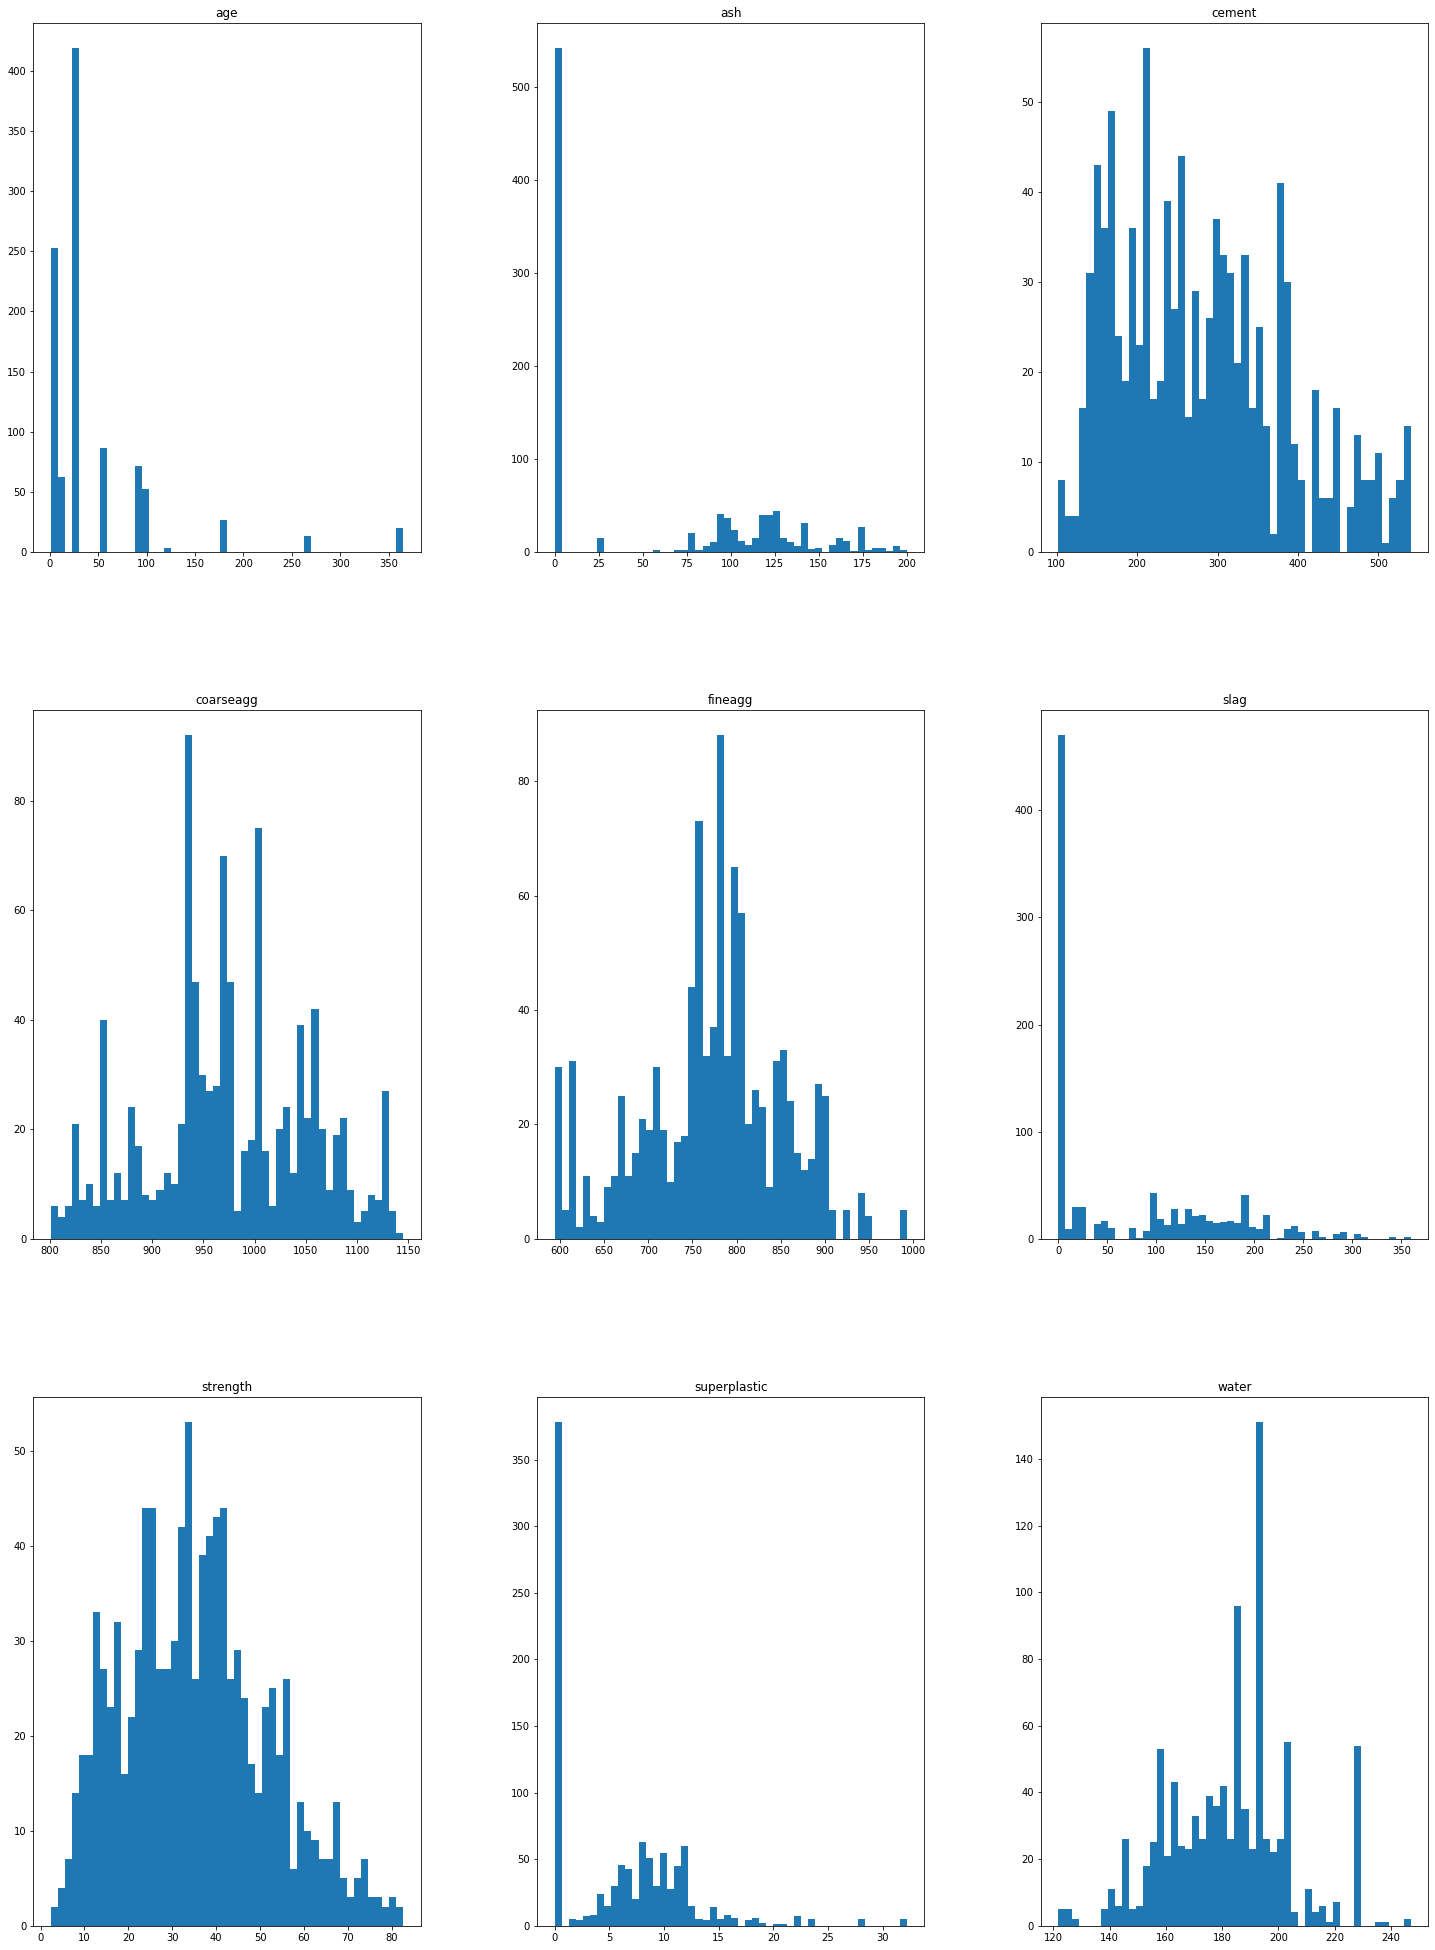

In [18]:
#Lets display the histograms

columns = list(df);
df[columns].hist(stacked=False, bins=50, figsize=(25,35), grid=False)

In [19]:
#We can observe lot of data points with 0 values for ash, slag and superplastic

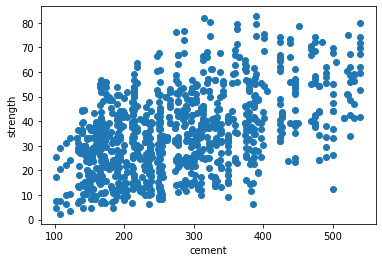

In [20]:
#Scatter plot for cement and strength

plt.scatter(df["cement"],df["strength"])
plt.xlabel('cement')
plt.ylabel('strength')
plt.show()

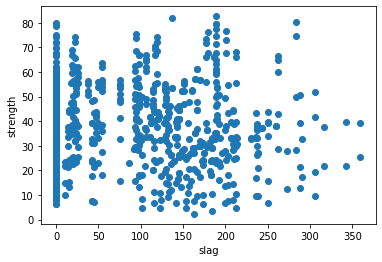

In [21]:
#Scatter plot for slag and strength

plt.scatter(df["slag"],df["strength"])
plt.xlabel('slag')
plt.ylabel('strength')
plt.show()

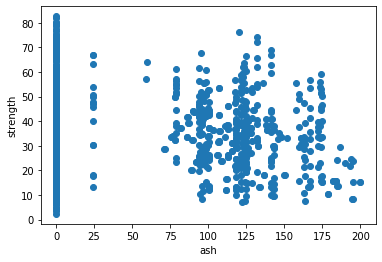

In [22]:
#Scatter plot for ash and strength

plt.scatter(df["ash"],df["strength"])
plt.xlabel('ash')
plt.ylabel('strength')
plt.show()

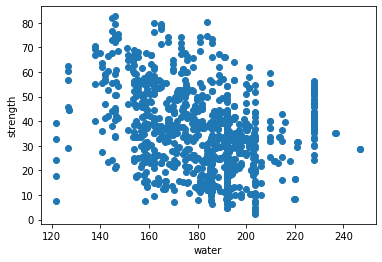

In [23]:
#Scatter plot for water and strength

plt.scatter(df["water"],df["strength"])
plt.xlabel('water')
plt.ylabel('strength')
plt.show()

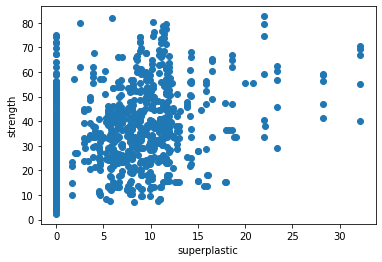

In [24]:
#Scatter plot for superplastic and strength

plt.scatter(df["superplastic"],df["strength"])
plt.xlabel('superplastic')
plt.ylabel('strength')
plt.show()

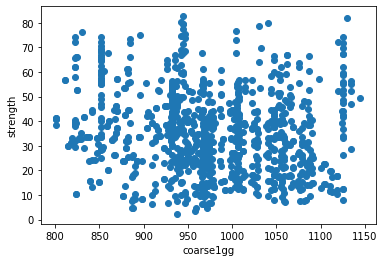

In [25]:
#Scatter plot for coarseagg and strength

plt.scatter(df["coarseagg"],df["strength"])
plt.xlabel('coarse1gg')
plt.ylabel('strength')
plt.show()

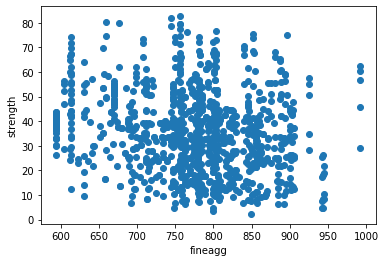

In [26]:
#Scatter plot for fineagg and strength

plt.scatter(df["fineagg"],df["strength"])
plt.xlabel('fineagg')
plt.ylabel('strength')
plt.show()

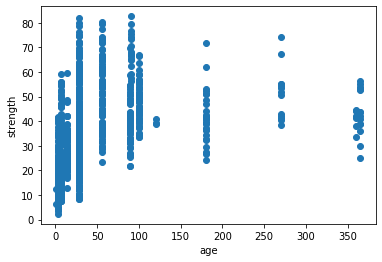

In [27]:
#Scatter plot for age and strength

plt.scatter(df["age"],df["strength"])
plt.xlabel('age')
plt.ylabel('strength')
plt.show()

In [28]:
#We can see that for slag and ash for value of 0, we have all kind of strength of concrete, this tells that they are
#not very strong predictors

In [29]:
#Separate Target and Feature Variables
X = df.drop(['strength'], axis=1)
Y = df['strength']

In [30]:
##### Handle Outliers

#Based on our ealier observation from box plots we noticed few outliers

#We noticed outliers for slag in the right side of the curve
#so for slag, mean + 2std will be 246.45
#We will replace the outliers which are more than 246.45 with 246.45
X['slag'] = np.where(X['slag'] > 246.45, 246.45, X['slag'])

#We noticed outliers for water on both sides of the curve
#so for water, mean + 2std will be 224.27 and mean - 2std will be 138.85
X['water'] = np.where(X['water'] > 224.27, 224.27, X['water'])
X['water'] = np.where(X['water'] < 138.85, 138.85, X['water'])

#We noticed outliers for superplastic in the right side of the curve
#so for superplastic, mean + 2std will be 18.15
#We will replace the outliers which are more than 18.15 with 18.15
X['superplastic'] = np.where(X['superplastic'] > 18.15, 18.15, X['superplastic'])

#We noticed outliers for fineagg in the right side of the curve
#so for fineagg, mean + 2std will be 933.93
#We will replace the outliers which are more than 933.93 with 933.93
X['fineagg'] = np.where(X['fineagg'] > 933.93, 933.93, X['fineagg'])

#We noticed outliers for age in the right side of the curve
#so for age, mean + 2std will be 172
#We will replace the outliers which are more than 172 with 172
X['age'] = np.where(X['age'] > 172, 172, X['age'])

In [31]:
#We dont see any strong relationship between any two independent variables so it does not make sense to make 
#composite feature

#Also we dont see any weak feature as well which is not going to affect prediction so we cannot drop any
#feature as well

In [32]:
#The complexity for the model is not going to be simple one as we can see not all the features are exhibiting
#perfect normal distribution

#Also we noticed earlier from the scatter plots that we are not getting slope of a perfect 1 or -1 for all
#features. Water and cement show direct relationship though

#We do have single gaussian for all the features except slag, ash and superplastic
#which again supports our previous observation that these 3 features are more likely to be weak predictors
#But we cannot rule out those features completely yet because then we will suffer with loss of data

#We can see that not all features can be explained by simple linear regression
#So we will try out Polynomial features with varying degress to get the best fit model

In [33]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [34]:
#Linear Regression with Polynomial features

def polyModel(X_train, X_test, y_train, y_test, degree):
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    return poly_model

#Lets try quadratic first
polyModel2 = polyModel(X_train, X_test, y_train, y_test, 2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 6.427827115199042
R2 score of training set is 0.8513640929880726


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.766341868686018
R2 score of test set is 0.8029773652896447


In [35]:
#Lets check the model by increasing the polynomial degree to 3
polyModel3 = polyModel(X_train, X_test, y_train, y_test, 3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.802836343728023
R2 score of training set is 0.9479751742105051


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.0782541717091805
R2 score of test set is 0.8410114082000849


In [36]:
#Lets check the model by increasing the polynomial degree to 4
polyModel4 = polyModel(X_train, X_test, y_train, y_test, 4)

The model performance for the training set
-------------------------------------------
RMSE of training set is 1.7980854528098433
R2 score of training set is 0.9883690277952834


The model performance for the test set
-------------------------------------------
RMSE of test set is 59.96121529127362
R2 score of test set is -14.472094243196777


In [37]:
#So, we see test data is not performing with degree 4, so we will go with degree 3

#Earlier we observed that slag, ash and superplastic are weak predictors.
#So lets try to evaluate our model by using feature elimination

#Separate Target and Feature Variables, also lets drop slag column
X = df.drop(['strength', 'slag'], axis=1)
Y = df['strength']

#Handle outliers like we did earlier
X['water'] = np.where(X['water'] > 224.27, 224.27, X['water'])
X['water'] = np.where(X['water'] < 138.85, 138.85, X['water'])
X['superplastic'] = np.where(X['superplastic'] > 18.15, 18.15, X['superplastic'])
X['fineagg'] = np.where(X['fineagg'] > 933.93, 933.93, X['fineagg'])
X['age'] = np.where(X['age'] > 172, 172, X['age'])

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

polyModel3WS = polyModel(X_train, X_test, y_train, y_test, 3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.922687815488018
R2 score of training set is 0.9128233948665233


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.074222675916996
R2 score of test set is 0.8412222415271668


In [38]:
#So we observed that removing slag was not a good idea, lets try with ash

#Separate Target and Feature Variables, also lets drop ash column
X = df.drop(['strength', 'ash'], axis=1)
Y = df['strength']

#Handle outliers like we did earlier
X['slag'] = np.where(X['slag'] > 246.45, 246.45, X['slag'])
X['water'] = np.where(X['water'] > 224.27, 224.27, X['water'])
X['water'] = np.where(X['water'] < 138.85, 138.85, X['water'])
X['superplastic'] = np.where(X['superplastic'] > 18.15, 18.15, X['superplastic'])
X['fineagg'] = np.where(X['fineagg'] > 933.93, 933.93, X['fineagg'])
X['age'] = np.where(X['age'] > 172, 172, X['age'])

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

polyModel3WA = polyModel(X_train, X_test, y_train, y_test, 3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 6.324392491046935
R2 score of training set is 0.8561092117529863


The model performance for the test set
-------------------------------------------
RMSE of test set is 8.264720687176652
R2 score of test set is 0.7060559925981212


In [39]:
#Same result as we are loosing datapoints here, lets try with superplastic

#Separate Target and Feature Variables, also lets drop superplastic column
X = df.drop(['strength', 'superplastic'], axis=1)
Y = df['strength']

#Handle outliers like we did earlier
X['slag'] = np.where(X['slag'] > 246.45, 246.45, X['slag'])
X['water'] = np.where(X['water'] > 224.27, 224.27, X['water'])
X['water'] = np.where(X['water'] < 138.85, 138.85, X['water'])
X['fineagg'] = np.where(X['fineagg'] > 933.93, 933.93, X['fineagg'])
X['age'] = np.where(X['age'] > 172, 172, X['age'])

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

polyModel3WSp = polyModel(X_train, X_test, y_train, y_test, 3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.440268902846535
R2 score of training set is 0.9290726218088527


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.20478057283835
R2 score of test set is 0.8343234263678732


In [40]:
#R2 score for test data with Superplastic was 0.88495
#R2 score for test data without Superplastic is 0.88592
#There is not much of a difference and we saw fall in training data R2 score as well

In [41]:
def removeOutliers(X):
    X['slag'] = np.where(X['slag'] > 246.45, 246.45, X['slag'])
    X['water'] = np.where(X['water'] > 224.27, 224.27, X['water'])
    X['water'] = np.where(X['water'] < 138.85, 138.85, X['water'])
    X['superplastic'] = np.where(X['superplastic'] > 18.15, 18.15, X['superplastic'])
    X['fineagg'] = np.where(X['fineagg'] > 933.93, 933.93, X['fineagg'])
    X['age'] = np.where(X['age'] > 172, 172, X['age'])
    return X

In [42]:
#Lets just see how important cement is for concrete

#Separate Target and Feature Variables
X = df.drop(['strength', 'cement'], axis=1)
Y = df['strength']

#Handle outliers like we did earlier
X = removeOutliers(X)

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

polyModel3WC = polyModel(X_train, X_test, y_train, y_test, 3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.139124471844085
R2 score of training set is 0.9049890553263008


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.484822682049234
R2 score of test set is 0.8190308860915976


In [43]:
#We saw significant fall in both training and test data R2 score. Same will be the case with water as its strong 
#predictor and rest of the features are intermediate in predicting strength

In [44]:
#We can use GridSearchCV algorithm to tune hyperparameters to increase the performance of the model
#Hyperparameters for Linear Regression
polyModel3.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [45]:
def printModelScore(model):
    #Separate Target and Feature Variables
    X = df.drop(['strength'], axis=1)
    Y = df['strength']

    #Handle outliers like we did earlier
    X = removeOutliers(X)

    # split into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

    poly_features = PolynomialFeatures(degree=3)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    
    #Fit the model with training data
    model.fit(X_train_poly, y_train)
    
    # predicting on training data-set
    y_train_predicted = model.predict(X_train_poly)
    
    # predicting on test data-set
    y_test_predict = model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    return model

In [46]:
#Lets apply GridSearch to tune hyperparameters
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}
grid = GridSearchCV(polyModel3, parameters, cv=2)

printModelScore(grid)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.802836352983771
R2 score of training set is 0.947975173957258


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.078224449935237
R2 score of test set is 0.8410129630582064


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
#We can see our previous best Model score for test data was: 0.8410114082000849
#With grid search on Linear regression parameters, score is: 0.8410129630582064

#So we didnt gain much, lets try Ridge regression
ridge = Ridge(alpha=0.01)
printModelScore(ridge)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.839642102228617
R2 score of training set is 0.946963256125406


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.151659864536928
R2 score of test set is 0.8371480818564798


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
#We observed similar results with ridge, lets try Lasso
lasso = Lasso(alpha=0.1)
printModelScore(lasso)

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.070851199903166
R2 score of training set is 0.9074967276498501


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.878685924989895
R2 score of test set is 0.8512802093589958


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
#We observed better performance for test data which should be our goal and we know
#this can be vary for different values of alpha
#So lets prepare a range of alpha values to test and perform a gridsearch

lasso = Lasso()
parameters = {'alpha': [100000, 50000, 30000, 20000, 10000, 7000, 5000, 1000, 500, 100, 50, 10, 1, 0.5, 0.1, 0.01, 0.001, 0]}
gridLasso = GridSearchCV(lasso, parameters, cv=2)
gridLasso = printModelScore(gridLasso)
print("\n")
print(gridLasso.best_estimator_.alpha)

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.507249475715958
R2 score of training set is 0.8908899226906636


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.580796566284323
R2 score of test set is 0.8659704274691383


20000


In [51]:
#We got performance improvement by trying out different values of alpha for Lasso regresion
#Lets try the same for Ridge
ridge = Ridge()
parameters = {'alpha': [100000, 50000, 30000, 20000, 10000, 7000, 5000, 1000, 500, 100, 50, 10, 1, 0.1, 0.01, 0.001, 0]}
grid = GridSearchCV(ridge, parameters, cv=2)
printModelScore(grid)
print("\n")
print(grid.best_estimator_.alpha)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.07035716756717
R2 score of training set is 0.9403980591522652


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.981558794545572
R2 score of test set is 0.8460296840827488


5000


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
#Without Lasso and Ridge regression our model score on test data: 0.8410114082000849
#Without Lasso and Ridge regression our model score on test data with an attempt to tune Linear Regression
#hyperparameters: 0.8410129630582064
#With Ridge regression, our model score on test data: 0.8460296840827488
#With Lasso regression, our model score on test data: 0.8659704274691383

In [53]:
#Lets do k-fold cross-validation for our best performing LAsso regression model as we observed its not overfitting
#as well with training data

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(gridLasso, X, Y, cv=kfold)

print(results.mean()*100.0)
print(results.std()*100.0)

56.69382905123393
16.019881816727967


In [ ]:
#So the model perforamnce range at 95% confidence level would be (mean - 1.96*std) to (mean + 1.96*std)
#(56.69 - 1.96*16.02) to (56.69 + 1.96*16.02)
#i.e. (25.29 - 88.09)